
 ## Mathematisches Experimentieren mit 'ipython notebook'

### Forschendes Lernen in der Sek II 


Dr. Martin Guggisberg <br>
Pädagogische Hochschule FHNW<br>
Basel, Schweiz<br>

<p>50. GDM-Jahrestagung Heidelberg 2016</p>

![eu](images/mmm.png)


Ausgehend vom arithmetisch-musikalischem Gruppenspiel Ping-Pong (Cslovjecsek, M., PM 42, 2011) wird in diesem Beitrag aufgezeigt, wie Schülerinnen und Schüler der Sekundarstufe 2 mit Hilfe des Werkzeug 'iPython notebook' einzelne Spielsituationen simulieren können und diese anhand spezieller Visualisierungen in verschiedene Kategorien einteilen können. Die Arbeitsweise der Schülerinnen und Schüler entspricht damit dem aktuellen Trend in der Forschung elektronische Notizbücher zu veröffentlichen.

## Gliederung
 - Mathematisches Experimentieren mit elektronischen Laborjournale 
 - Exemplarisches Beispiel zum arithmetisch-musikalischem Gruppenspiel Ping-Pong

## Experimentieren


Durch Hypothesen geleitetes, __planvolles und kontrolliertes Handeln__ mit Objekten zum Zweck der __Erkenntnisgewinnung__ durch __Beobachtung__ 

( Ludwig & Oldenburg 2007)

### Experimentieren in der Mathematik 
- Mathematik zum Anfassen (Mathematikum in Gießen, Beutelspacher)
- Lernen durch Experimentieren (Ludwig & Oldenburg)
- Mathematics by experiment (Borwein & Bailey)
- Schnecken im Sofa beim Umzug mit Stern (Kaenders, GDM 2016)

### Mathematisches Experimentieren mit dem PC

A. Engel,Stuttgart : Klett, 1991 
Inhalt: Zahlentheoretische Algorithmen, Wahrscheinlichkeit,Statistik, Kombinatorische Algorithmen

Mit dem Computer experimentieren $\to$ Wissenschaftliches Rechnen

Neue Studiengänge Computational Sciences in  XXX

### Laborjournal

Systematische Aufzeichnung aller inneren und äusseren Paramter,
geometrische Konfiguration, sowie die experimentel ermittelten Ergebnisse.


![lab](images/labbook3.jpg)

### Elektronische Laborjournale

- Automatisierte elektronische Erfassung aller Parameter
- Möglichkeit für interaktive, manuelle Ergänzungen (Figuren, math. Formeln, Texte)

$$ \mbox{z.B. Fehlerintegral von Gauss} \int_{-\infty}^\infty e^{{-x}^2} dx = \sqrt{\pi} $$


- Werkzeuge zur Datenvisualisierung

### ipython notebooks 
- Entwickelt seit 2010
- Erweiterung auf weitere Programmiersprachen
- ipython notebook $\to$ __jupyter notebook__
- Einsatz
    - Interaktive Hochschulkursunterlagen 
    - Elektronische Laborjournal und Bücher

### Von Ipython zu Jupyter

![IPython_Jupyter](images/IPython_Jupyter.png)


### direktes Arbeiten in der Cloud
- [https://try.jupyter.org/](https://try.jupyter.org/)
- [https://studio.azureml.net/](https://try.jupyter.org/)

<br>
### nahtlose Verteilung 
- Notebook Gallery [http://nb.bianp.net/sort/views/](http://nb.bianp.net/sort/views/)
- Beispiele 
    - [Functional Geometry](http://nbviewer.jupyter.org/github/shashi/ijulia-notebooks/blob/master/funcgeo/Functional%20Geometry.ipynb)
    - [Statik eines Kranauslegers](http://nbviewer.jupyter.org/github/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Federmodell.ipynb)




### Voraussetzungen für mathematische Experimente

- Offen Ausgangslage 
- Unüberschaubarer Konfigurationsraum
<br>
#### Beispiele
 - Spiele wie z.B. Schach 
 - Naturwissenschaftliche Simulationen 
   - [Aerodynamics-Hydrodynamics](https://github.com/barbagroup/AeroPython)  
   - [Reaktions-Diffusion-Systeme](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Reaktions-Diffusions-System.ipynb)
   - [Schwarmverhalten](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Python-Notebooks/Schwarm.ipynb)
        

![simuprojekt](images/simulationsprojekt.JPG)

### Einsatz von elektronischen Laborjournalen an der Hochschule 

- Lehrerausbildung Masterkurs [Wissenschaftliches Rechnen](https://github.com/mgje/PIUMP/tree/master/Beispiele_Skript_SciComputing)
- EU Forschungsprojekt: ["European Music Portfolio - Maths: Sounding ways into Mathematics"](http://www.emportfolio.eu/)

## Ping-Pong Aktivität

![ping-pong](images/pingpong.png)

Das Ping-Pong Spiel behandelt eine koordinative, kooperative, rhythmische AufgabensteIlung, welche mit Gruppen von 4 bis 26 Schülerinnen und Schülern durchgeführt werden kann. 

![Math_Science_Night_2015_36.JPG](images/Math_Science_Night_2015_36.JPG)

Cslovjecsek, M., Guggisberg, M. & Linneweber-Lammerskitten H. (2011). Mathe macht Musik Ping-Pong, PM Praxis der Mathematik 42 (pp. 13 – 18). 

In [5]:
import io
import base64
from IPython.display import HTML

#def showPinPongVideo():
#video = io.open('images/PingPongDemo.mp4', 'r+b').read()
#encoded = base64.b64encode(video)
#HTML(data='''<video alt="test" controls>
#                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
#             </video>'''.format(encoded.decode('ascii')))

### Spielregeln:
- Die ganze Klasse sitzt im Kreis. 
- Dazu wird der Reihe nach fortlaufend gezählt (1,2, 3, 4 ...).
- In einem ersten Schritt werden alle Dreier-Zahlen (3, 6, 9, 12, 15 ...) mit dem Wort "Ping" ersetzt. 
- Analog werden dann die Vierer-Zahlen (4, 8, 12, 16 .. .) mit ,,Pong" ersetzt.
- Nach einigem Üben kann versucht werden, die Dreier- und Vierer-Zahlen gleichzeitig zu ersetzen (12, 24 ... heißt dann Ping-Pong ).
- Viel Übung ist erforderlich, wenn bei Ping und Pong als zusätzliche Regel ein Richtungswechsel vorgenommen wird

### Spiel mit Ping = 3 und Pong = 4

<!-- ![pinpongspiel](images/pingpong3.gif) -->

![pp](images/ortsdarstellung.png)

### Was muss ich sagen, wenn ich an die Reihe komme ?
<br>

### Welche Zähl-Zahlen treten bei meiner Spielposition auf ?
<br>
### Gibt es eine Partitur für dieses Spiel ?
<br>
### Durch Abzählung zur Lösung

$\mathbb{N} \times \mathbb{N} \times \mathbb{N} \to \mathbb{Z}$

$(n, \mbox{Ping-Zahl}, \mbox{Pong-Zahl}) \mapsto \mbox{Spielposition}$






### Verschiedene Darstellungen des Spielverlaufs 
### für ping = 3 und pong = 4

![pingpongkreis](images/Fieberkurve.png)

#### Durch Abzählen zur Lösung (Python Programm)

In [6]:
def pingpong(n, ping=3, pong=4):
    p = 0
    # Zählschritt (1 oder -1)
    step = 1
    # Zählen von 1 bis n
    for i in range(1,n+1):
        p = p + step
        # Vergleiche Zähl-Zahl mit ping und pong 
        # falls genau eine Bedingung zutrifft (xor) 
        # -> ändere die Richtung (XOR) 
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

pingpong(4)

2

#### Pseudo-Code Ping-Pong zur Berechnung der Spielposition

    p = 0
    step = 1
    for i : 1 .. N do
        p = p + step
        if (i mod ping) xor (i mod pong)
            step = (-1)* step
    return p


## Spielpositionen für die ersten 30 Zähl-Zahlen

In [3]:
y = [pingpong(n) for n in range(1,30)]
print (y)

[1, 2, 3, 2, 3, 4, 3, 2, 3, 2, 1, 0, -1, -2, -3, -2, -3, -4, -3, -2, -3, -2, -1, 0, 1, 2, 3, 2, 3]


### Visualisierung des Spielverlaufs mithilfe eines Zähl-Zahl-Position-Diagramms

In [7]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
def init_plot():
    fig = figure(figsize=(12, 6))
    #fig = figure(figsize=(6, 5.5))
    yticks(size=16)
    xticks(size=16)
    xlabel(u'Zähl-Zahl',fontsize=16)
    ylabel('Spielposition',fontsize=16)
    k = len(y)
    #xlim([1,k-1]) 
    #xticks(np.arange(1, k, 1.0))
    

/Users/guggisberg/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


'Spielverlauf ping=3 , pong=4'

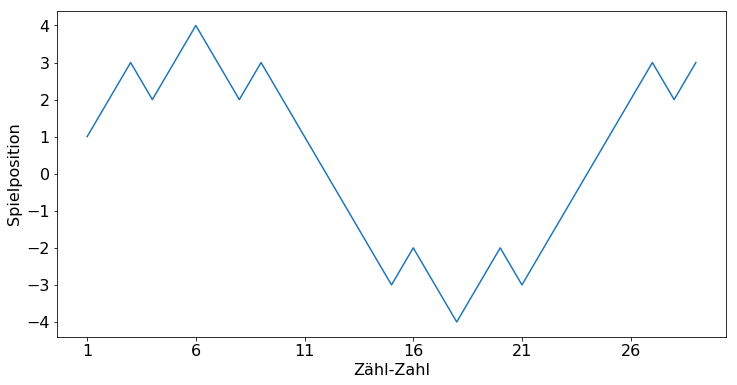

In [8]:
init_plot()
xticks(np.arange(0,len(y),5),np.arange(1,len(y),5),size=16)
plot(y)
'Spielverlauf ping=3 , pong=4'

#### Abhängigkeit von  Ping- und Pong-Zahlen 

'Spielverlauf ping=3 , pong=5'

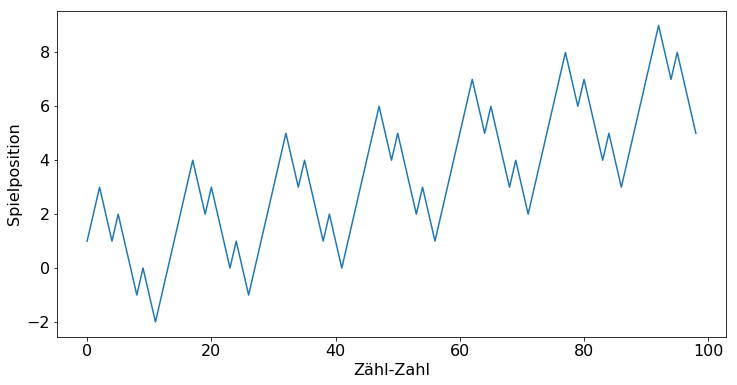

In [9]:
## Abhängigkeit von Ping und Pong
ping = 3
pong = 5
y = [pingpong(n,ping,pong) for n in range(1,100)]
init_plot()
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Weitere divergente Konfigurationen

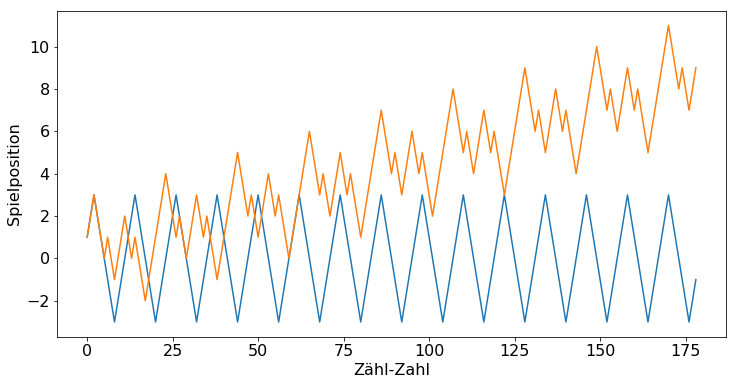

In [10]:
y = [[pingpong(n,3,pong) for pong in range(6,8,1)] \
     for n in range(1,180) ]
init_plot()
plot(y)
#legend(('ping=3,pong=5','ping=3,pong=7','ping=3,pong=9','ping=3,pong=11'))

## 6 Perioden

'Spielverlauf ping=4 , pong=16'

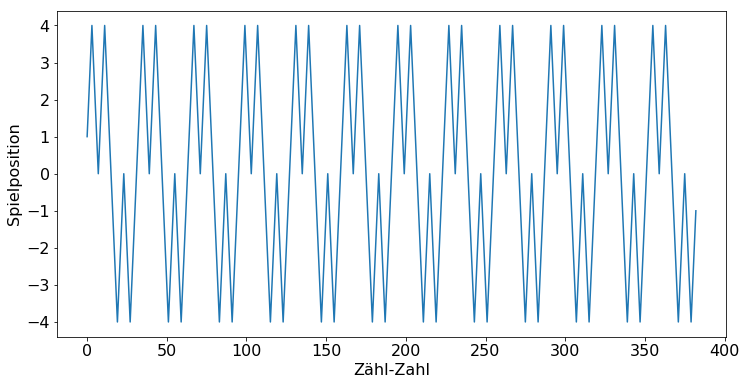

In [11]:
ping=4
pong=16
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,6*ping*pong)]
plot(y)
'Spielverlauf ping=%d , pong=%d' %(ping,pong)

### Ping-Pong Parameter Karte / Spielposition in Abhängigkeit von Ping und Pong

In [12]:
def plot_maps(zmin,zmax):
    n_col = 4
    n_row = 3
    dn = 50
    figure(figsize=(2.6 * n_col, 2.6 * n_row))
    subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(1,n_row * n_col+1):
        subplot(n_row, n_col, i)
        title('n='+str(int(i*dn)))
        imshow( [[pingpong(i*dn,k,l) for l in range(2,41)] for k in range(2,41)],vmin=zmin,vmax=zmax)
    colorbar()

""

''

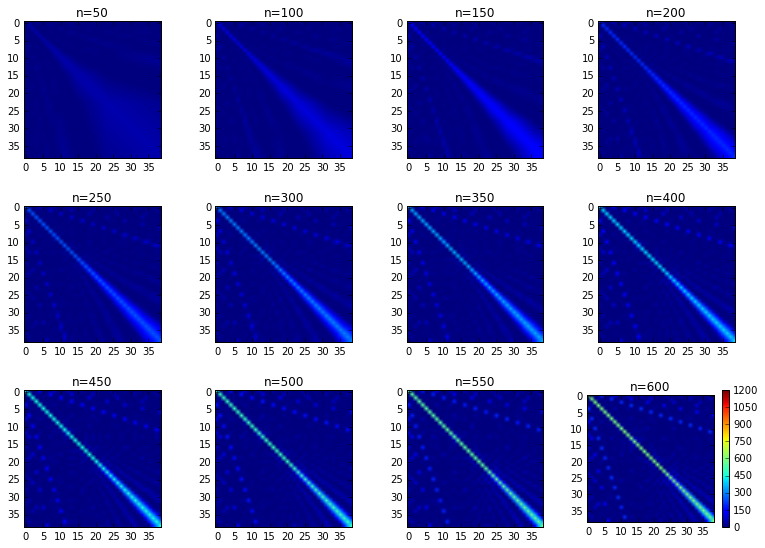

In [10]:
plot_maps(0,1200)

In [13]:
import numpy as np

def plot_map_n_12347(zmin,zmax):
    ymap = [[pingpong(12347,k,l) for l in range(2,41)] for k in range(2,41)]
    fig = figure(figsize=(12, 8))
    xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
    imshow(ymap,interpolation="nearest",vmin=zmin,vmax=zmax);
    cbar=colorbar()
    cbar.ax.tick_params(labelsize=16) 
    'Parameter Karte ping = 2..40 , pong = 2..40'
    

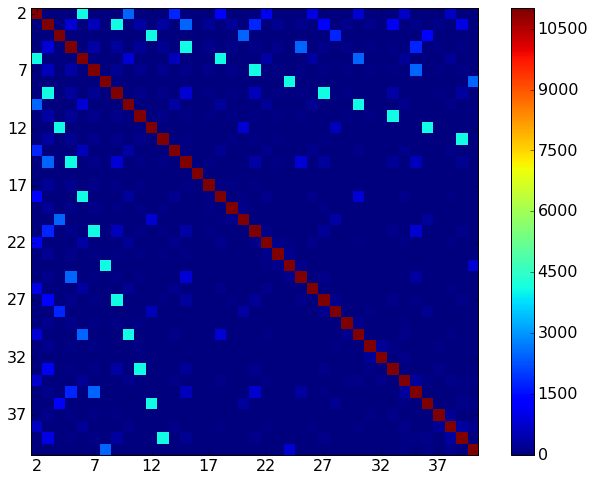

In [12]:
plot_map_n_12347(0,11000)

divergente Fälle: (2,6);(3,9);(4,12);(5,15)
<br>(2,10);(3,15);(4,20)

## Wertebereiche auf -500 .. 500 einschränken 

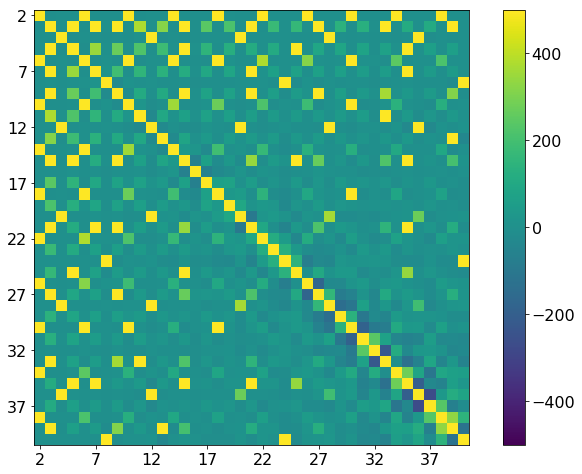

In [14]:
plot_map_n_12347(-500,500)

### Betrachtung von Fälle ping > 35, pong > 36, nahe bei der Diagonalen
(39,40) , (39,38) , (39,36) 
(37,40) , (37,38) , (37,36)
(35,40) , (37,38) , (37,36)


'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

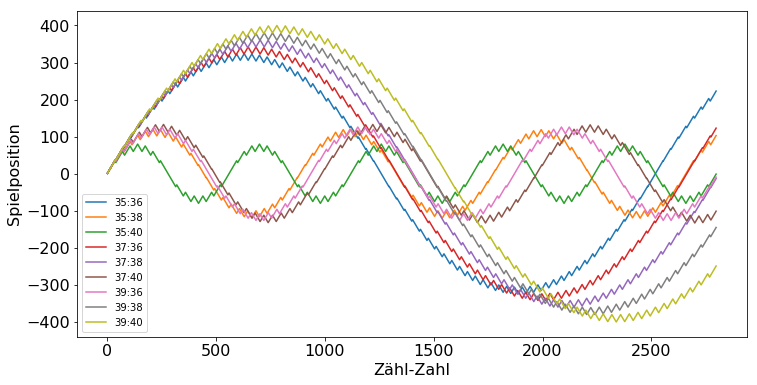

In [15]:
init_plot()
legend((('p33:40', 'p35:40', 'p37:40', 'p39:40')))
y = [[pingpong(n,ping,pong) for ping in range(35,41,2) for pong in range(36,41,2)] for n in range(1,2800) ]
leg= [str(str(ping)+':'+str(pong)) for ping in range(35,41,2) for pong in range(36,41,2)]
plot(y)
legend(tuple(leg))
'Spielverlauf (35,36) , (35,38) , (35,40) , (37,36) , (37,38) , (37,40), (39,36) , (39,38) , (39,40)'

### Kombinationen von ungeraden und geraden teilerfremden Paare scheinen periodisch zu sein

Mit einer Periodizität von 

$$ 2 \cdot ping \cdot pong $$

Und einer Amplitude von 

$$ \approx \frac{32}{125} \cdot ping \cdot pong $$

'Spielverlauf ping=41 , pong=42'

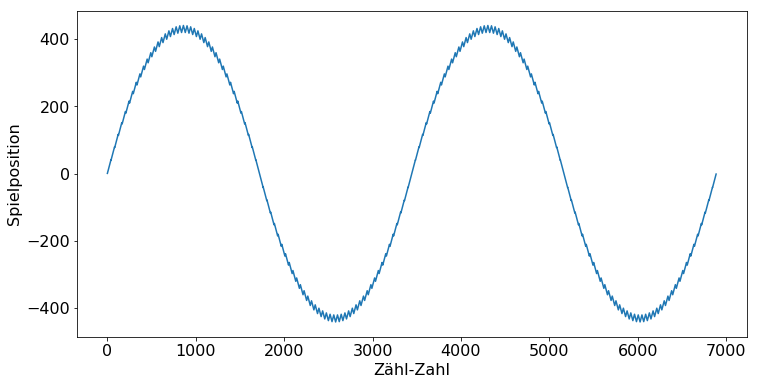

In [16]:
ping = 41
pong = 42 #Torsten
init_plot()
y = [pingpong(n,ping,pong) for n in range(1,4*ping*pong) ]
plot(y)

'Spielverlauf ping=%d , pong=%d' %(ping,pong)



### Vergleich einer normalisierten Ping-Pong Kurve mit einer Sinus Funktion

In [17]:
import numpy as np
from math import pi

def fitPingPong(ping,pong):
    Amplitude = 32.0 / 125 * ping *ping
    x = np.linspace(0,4*pi,4*ping*pong-1)
    y = np.array([pingpong(n,ping,pong)/Amplitude for n in range(1,4*ping*pong) ])
    y2 = np.sin(x)
    return x,y,y2



In [18]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
def init_plot():
    fig = figure(figsize=(12, 6))
    #fig = figure(figsize=(6, 5.5))
    yticks(size=16)
    xticks(size=16)
    xlabel(u'x',fontsize=16)
    ylabel('y',fontsize=16)
    k = len(y)
    #xlim([1,k-1]) 
    #xticks(np.arange(1, k, 1.0))
    

'Approximation von sin(x) durch normalisierten Spielverlauf (41,42)'

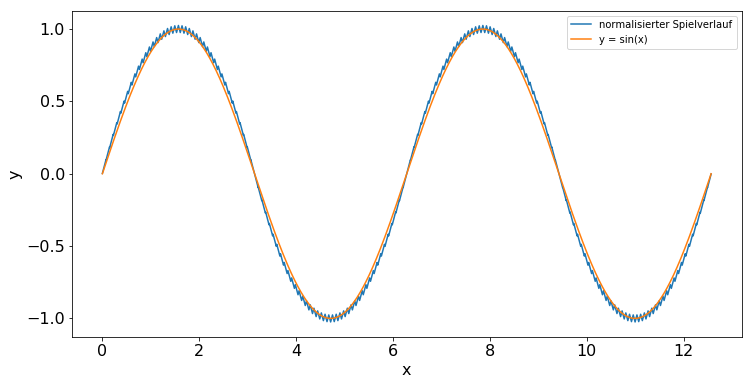

In [19]:
x,y,y2 = fitPingPong(41,42)
init_plot()
plot(x,y,'-',x,y2,'-')
legend(('normalisierter Spielverlauf','y = sin(x)'))
'Approximation von sin(x) durch normalisierten Spielverlauf (41,42)'


In [21]:
## nur fälle mit ggT = 1
from fractions import gcd
def pingpong2(n, ping=3, pong=4):
    if gcd(ping,pong) != 1:
        return -1
    p = 0
    step = 1
    for i in range(1,n+1):
        p = p + step
        if bool(i%ping)^bool(i%pong):
            step *= (-1)
    return p

/Users/guggisberg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.


'Parameter Karte ping = 2..40 , pong = 2..40'

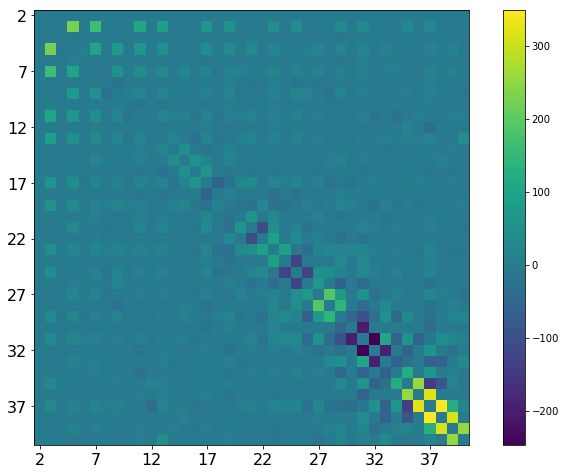

In [22]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41)] for k in range(2,41)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
yticks(np.arange(0,40,5),np.arange(2,40,5),size=16)
imshow(ymap,interpolation="nearest");
colorbar()
'Parameter Karte ping = 2..40 , pong = 2..40'

## die Karte zeigt,  dass es weitere divergente Fälle gibt.

Weitere Untersuchungen zeigen, dass ping,pong Zahlenpaare divergieren, wenn beide Zahlen ungerade sind. Die Betrachtung von ausschliesslich geraden und ungeraden Paaren zeigt. 

/Users/guggisberg/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.


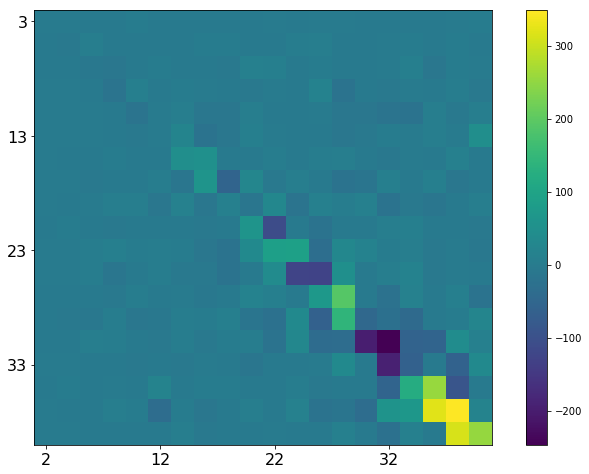

In [23]:
ymap = [[pingpong2(3433,k,l) for l in range(2,41,2)] for k in range(3,41,2)]

fig = figure(figsize=(12, 8))
xticks(np.arange(0,20,5),np.arange(2,40,10),size=16)
yticks(np.arange(0,20,5),np.arange(3,40,10),size=16)

imshow(ymap,interpolation="nearest");
colorbar()

### Potenzial von elektronischen Laborjournalen

- Abzählung von Möglichkeiten
- Numerischen Berechnungen
- Visualisierung von Phasenräumen

- interaktiv - direkt im Browser lauffähig

- Kann als Präsentationswerkzeug verwendet werden

- 100% Open Source

### Mögliche Themenfelder

- Numerik 
- Mechanik 
- Thermodynamik 
- Populationsdynamik 
- Informatik

``` Mathematiker wie z.B. Fermat, Gauß, Euler oder Riemann haben viele Stunden ihres Lebens damit verbrachten, Rechnungen im Kopf durchzuführen, um "mögliche Wahrheiten" zu erkunden. ```




### Mögliche Themen für Schuluntericht (Sekundarstufe II):

- Entdecken durch Abzählen
    - Konvergenz von Folgen und Reihen
    - Berechnung von Wahrscheinlichkeiten
    - Approximation spezieller Zahlen 

- Entdeckung durch Visualisierung
    - Verhalten von Funktionen
    - Symmetrien in der Ebene

- Experimentelle Untersuchung von Daten 
    - Suche nach Gesetzmässigkeiten (Regression, Methode der kleinsten Quadrate)
    - Untersuchung von Korrelationen


# Vielen Dank !
<br>

### Alle Materialien sind auf github

### Dieses elektronische Laborjournal finden Sie auf

[https://github.com/mgje/PIUMP](https://github.com/mgje/PIUMP)

<br>

### Vortrag: Sounding Ways into Mathematics
#### Do 10.3. 8:15-9:00 Uhr Ort: A125
Musikalische Zugänge zur Mathematik – Sounding Ways into Mathematics

Andreas Richard, Markus Cslovjecsek

### Code for Paper




In [24]:
def pingpong(n, ping=3, pong=4):
    p = 0                     # position
    step = 1                  # (-1, 1)
    
    for i in range(1,n+1):    # count from 1 to n
        p = p + step          # next position
        if bool(i%ping)^bool(i%pong): #calculate the next step (XOR)
            step *= (-1)
    return p



```pseudo
visit registration page
enter email address
if new user
  fill in registration form
  submit
  if validation error
    fix registration form
    review the fix
    submit
  else
    submit
  end
else
  enter password
  if password wrong
    ask password again
  else
    good to go
  end
  confirm account info
end
confirm registration info
```